In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
display(df.head())
print(df.info())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


 - App = Nama Aplikasi
 - Category = Kelas/divisi yang menggabungkan aplikasi dengan ciri-ciri yang sama
 - Rating = Overall ulasan pengguna (out of 5)
 - Reviews = Jumlah ulasan yang diterima aplikasi saat di scrape
 - Type = Apakah aplikasi berbayar atau gratis
 - Installs = Jumlah pengunduhan total dari waktu rilis hingga waktu di-scrape
 - Content Rating = Age Group yang ditarget berdasarkan konten
 - Genre = Tema general yang disajikan konten aplikasi tersebut
 - Current Ver = Versi aplikasi ketika di-scrape
 - Android Ver = Minimum OS untuk bisa me-run aplikasi tersebut

In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Data Cleaning
### 1. Missing Data Study

In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
# df[df['Size'] == 'Varies with device']
# df.isnull()
# df['Size'].value_counts()
df.values.tolist()

[['Photo Editor & Candy Camera & Grid & ScrapBook',
  'ART_AND_DESIGN',
  4.1,
  '159',
  '19M',
  '10,000+',
  'Free',
  '0',
  'Everyone',
  'Art & Design',
  'January 7, 2018',
  '1.0.0',
  '4.0.3 and up'],
 ['Coloring book moana',
  'ART_AND_DESIGN',
  3.9,
  '967',
  '14M',
  '500,000+',
  'Free',
  '0',
  'Everyone',
  'Art & Design;Pretend Play',
  'January 15, 2018',
  '2.0.0',
  '4.0.3 and up'],
 ['U Launcher Lite – FREE Live Cool Themes, Hide Apps',
  'ART_AND_DESIGN',
  4.7,
  '87510',
  '8.7M',
  '5,000,000+',
  'Free',
  '0',
  'Everyone',
  'Art & Design',
  'August 1, 2018',
  '1.2.4',
  '4.0.3 and up'],
 ['Sketch - Draw & Paint',
  'ART_AND_DESIGN',
  4.5,
  '215644',
  '25M',
  '50,000,000+',
  'Free',
  '0',
  'Teen',
  'Art & Design',
  'June 8, 2018',
  'Varies with device',
  '4.2 and up'],
 ['Pixel Draw - Number Art Coloring Book',
  'ART_AND_DESIGN',
  4.3,
  '967',
  '2.8M',
  '100,000+',
  'Free',
  '0',
  'Everyone',
  'Art & Design;Creativity',
  'June 20, 20

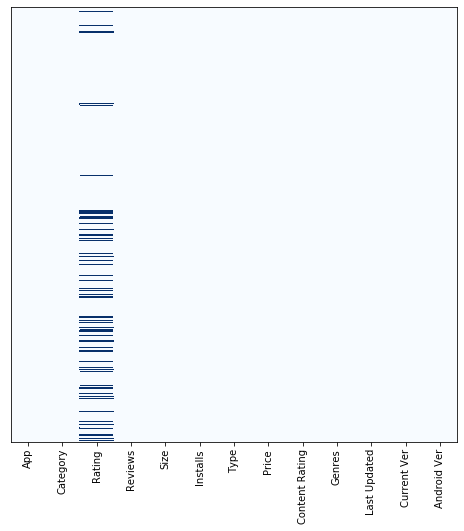

In [7]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
for _, spine in ax.spines.items():
    spine.set_visible(True)

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Removing 'M' and 'K' from Size columns to make it Numeric

In [9]:
df['Size'] = df['Size'].apply(lambda x: x.replace('M', ''))


df['Size'] = df['Size'].apply(lambda x: x.replace('Varies with device', '14'))
b = df.values.tolist()
for a in b:
    if 'k' in a[4]:
        idx = df[df['Size'] == a[4]].index
        val = a[4]
        val = a[4].replace('k', '')
        val = round(float(val)/1000)
        df['Size'].loc[idx] = val

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
df['Size'].value_counts()

14      1802
12       161
11       159
15       159
13       157
        ... 
89         9
86         8
10.0       6
90         5
1.0        4
Name: Size, Length: 184, dtype: int64

Make Size column to float

In [11]:
df['Size'] = df['Size'].apply(lambda x: float(x))

Making Reviews numeric

In [12]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

Removing '+', ',', from installs to make it integer 

In [13]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',''))
df['Installs'] = df['Installs'].apply(lambda x: int(x.replace(',','')))
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
df['Price'] = df['Price'].apply(lambda x: float(x.replace('$','')))
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Removing '_' character from categories

In [15]:
df['Category'] = df['Category'].apply(lambda x:x.replace('_',''))

## 2.Description

In [16]:
listitem = []
for col in df.columns:
    listitem.append([col,df[col].dtype,df[col].isna().sum(),round((df[col].isna().sum()/len(df[col]))*100,2),df[col].nunique(), list(df[col].unique()[:2])]);
    
dfdesc = pd.DataFrame(columns=['DataFeatures','DataType','Null','NullPct','Unique','UniqueSample'], data=listitem)
dfdesc

,DataFeatures,DataType,Null,NullPct,Unique,UniqueSample
0,App,object,0,0.0,8190,[Photo Editor & Candy Camera & Grid & ScrapBoo...
1,Category,object,0,0.0,33,"[ARTANDDESIGN, AUTOANDVEHICLES]"
2,Rating,float64,0,0.0,39,"[4.1, 3.9]"
3,Reviews,int64,0,0.0,5990,"[159, 967]"
4,Size,float64,0,0.0,182,"[19.0, 14.0]"
5,Installs,int64,0,0.0,19,"[10000, 500000]"
6,Type,object,0,0.0,2,"[Free, Paid]"
7,Price,float64,0,0.0,73,"[0.0, 4.99]"
8,Content Rating,object,0,0.0,6,"[Everyone, Teen]"
9,Genres,object,0,0.0,115,"[Art & Design, Art & Design;Pretend Play]"


# Exploratory Data Analysis

### 1. Count Distribution

In [17]:
# Ratings
ratingtypes = df.groupby('Rating').count().index.tolist()
ratingcount = df.groupby('Rating').count()['App'].tolist()

In [18]:
# Price
pricetypes = df.groupby('Price').count().index.tolist()
pricecount = df.groupby('Price').count()['App'].tolist()
# Pricecount = []
for i in range(len(pricetypes)):
    pricetypes[i] = round(float(pricetypes[i]))

In [19]:
# Reviews
cattypes = df.groupby('Category').count().index.tolist()
catcount = df.groupby('Category').count()['App'].tolist()

In [20]:
# Install
instypes = df.groupby('Installs').count().index.tolist()
inscount = df.groupby('Installs').count()['App'].tolist()
insticks = []

for i in range(len(instypes)):
    insticks.append(i+1)

In [21]:
df.groupby('Installs').count()['App']

Installs
1                3
5                9
10              69
50              56
100            309
500            201
1000           712
5000           431
10000         1009
50000          466
100000        1150
500000         537
1000000       1576
5000000        752
10000000      1252
50000000       289
100000000      409
500000000       72
1000000000      58
Name: App, dtype: int64

In [22]:
instypes

[1,
 5,
 10,
 50,
 100,
 500,
 1000,
 5000,
 10000,
 50000,
 100000,
 500000,
 1000000,
 5000000,
 10000000,
 50000000,
 100000000,
 500000000,
 1000000000]

In [23]:
df.groupby('Rating').count()['App']

Rating
1.0      16
1.2       1
1.4       3
1.5       3
1.6       4
1.7       8
1.8       8
1.9      13
2.0      12
2.1       8
2.2      14
2.3      20
2.4      19
2.5      21
2.6      25
2.7      25
2.8      42
2.9      45
3.0      83
3.1      69
3.2      63
3.3     102
3.4     128
3.5     163
3.6     174
3.7     239
3.8     303
3.9     386
4.0     567
4.1     707
4.2     951
4.3    1076
4.4    1108
4.5    1037
4.6     823
4.7     499
4.8     234
4.9      87
5.0     274
Name: App, dtype: int64

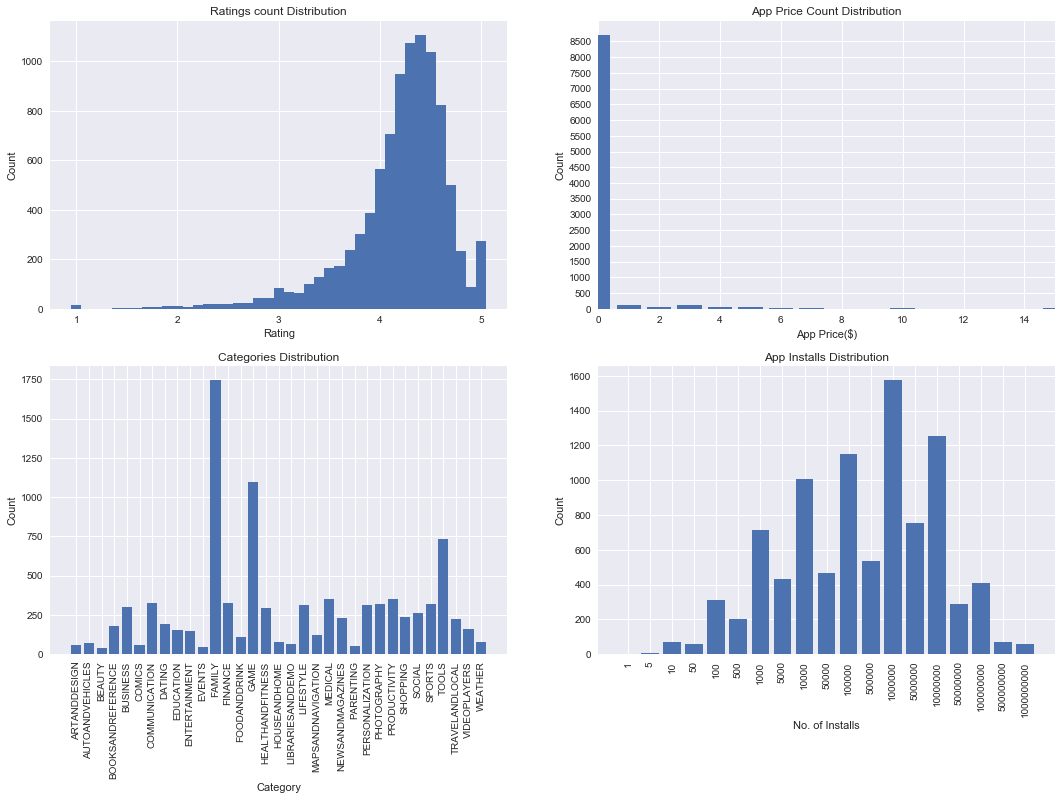

In [24]:
plt.figure(figsize = (18,18))
plt.style.use('seaborn')

plt.subplot(3,2,1)
plt.bar(ratingtypes, ratingcount, width=0.1)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings count Distribution')

plt.subplot(3,2,2)
plt.bar(pricetypes, pricecount)
plt.xlim(0, 15)
plt.yticks(np.arange(0, max(pricecount), 500))
plt.xlabel('App Price($)')
plt.ylabel('Count')
plt.title('App Price Count Distribution')

plt.subplot(3,2,3)
plt.bar(cattypes, catcount)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Categories Distribution')

plt.subplot(3,2,4)
plt.bar(insticks, inscount)
plt.xticks(insticks, instypes, rotation=90)
plt.xlabel('No. of Installs')
plt.ylabel('Count')
plt.title('App Installs Distribution')

plt.show()

### 2. Feature Correlations

i. Best Performing Categories (with its Genres)

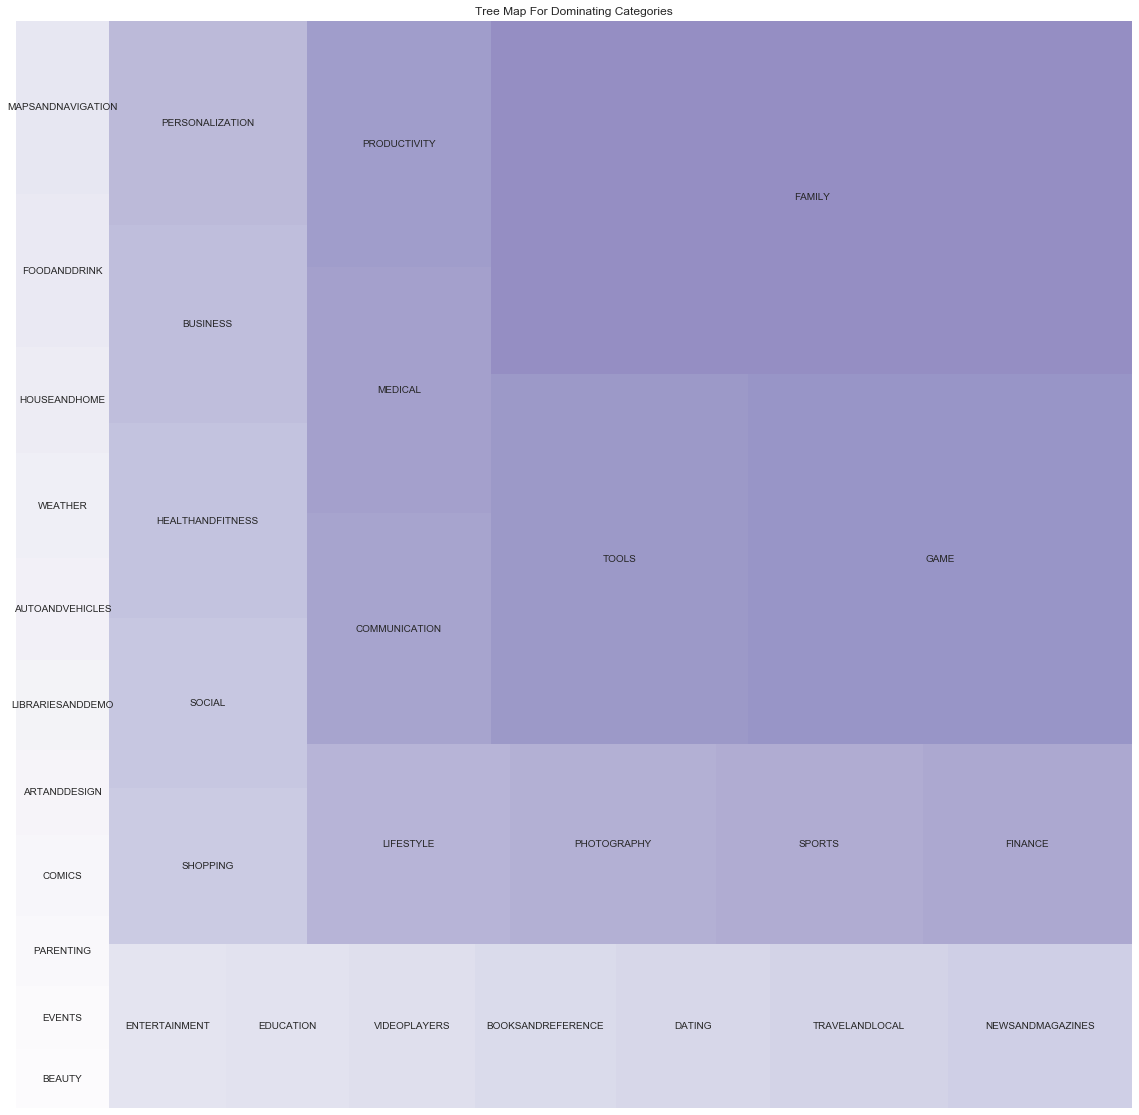

In [25]:
import squarify
plt.figure(figsize=(20,20))
color = plt.cm.Purples(np.linspace(0,1,50))

categories = df['Category'].value_counts().sort_values(ascending=True)
squarify.plot(sizes=categories.values, label=categories.index, alpha=.8, color=color)
plt.title('Tree Map For Dominating Categories')
plt.axis('off')
plt.show()

In [26]:
color

array([[0.98823529, 0.98431373, 0.99215686, 1.        ],
       [0.98023837, 0.97570165, 0.98723568, 1.        ],
       [0.97224145, 0.96708958, 0.98231449, 1.        ],
       [0.96424452, 0.95847751, 0.97739331, 1.        ],
       [0.9562476 , 0.94986544, 0.97247213, 1.        ],
       [0.94665129, 0.93953095, 0.96656671, 1.        ],
       [0.93865436, 0.93091888, 0.96164552, 1.        ],
       [0.92659746, 0.91976932, 0.95570934, 1.        ],
       [0.91367935, 0.90808151, 0.94955786, 1.        ],
       [0.89817762, 0.89405613, 0.94217609, 1.        ],
       [0.88525952, 0.88236832, 0.93602461, 1.        ],
       [0.87234141, 0.87068051, 0.92987313, 1.        ],
       [0.8594233 , 0.8589927 , 0.92372165, 1.        ],
       [0.84290657, 0.84330642, 0.91557093, 1.        ],
       [0.82076125, 0.82189927, 0.90449827, 1.        ],
       [0.80230681, 0.80405998, 0.89527105, 1.        ],
       [0.78385236, 0.78622068, 0.88604383, 1.        ],
       [0.76539792, 0.76838139,

In [27]:
categories

BEAUTY                 42
EVENTS                 45
PARENTING              50
COMICS                 58
ARTANDDESIGN           61
LIBRARIESANDDEMO       64
AUTOANDVEHICLES        73
WEATHER                75
HOUSEANDHOME           76
FOODANDDRINK          109
MAPSANDNAVIGATION     124
ENTERTAINMENT         149
EDUCATION             155
VIDEOPLAYERS          160
BOOKSANDREFERENCE     178
DATING                195
TRAVELANDLOCAL        226
NEWSANDMAGAZINES      233
SHOPPING              238
SOCIAL                259
HEALTHANDFITNESS      297
BUSINESS              303
PERSONALIZATION       312
LIFESTYLE             314
PHOTOGRAPHY           317
SPORTS                319
FINANCE               323
COMMUNICATION         328
MEDICAL               350
PRODUCTIVITY          351
TOOLS                 733
GAME                 1097
FAMILY               1746
Name: Category, dtype: int64

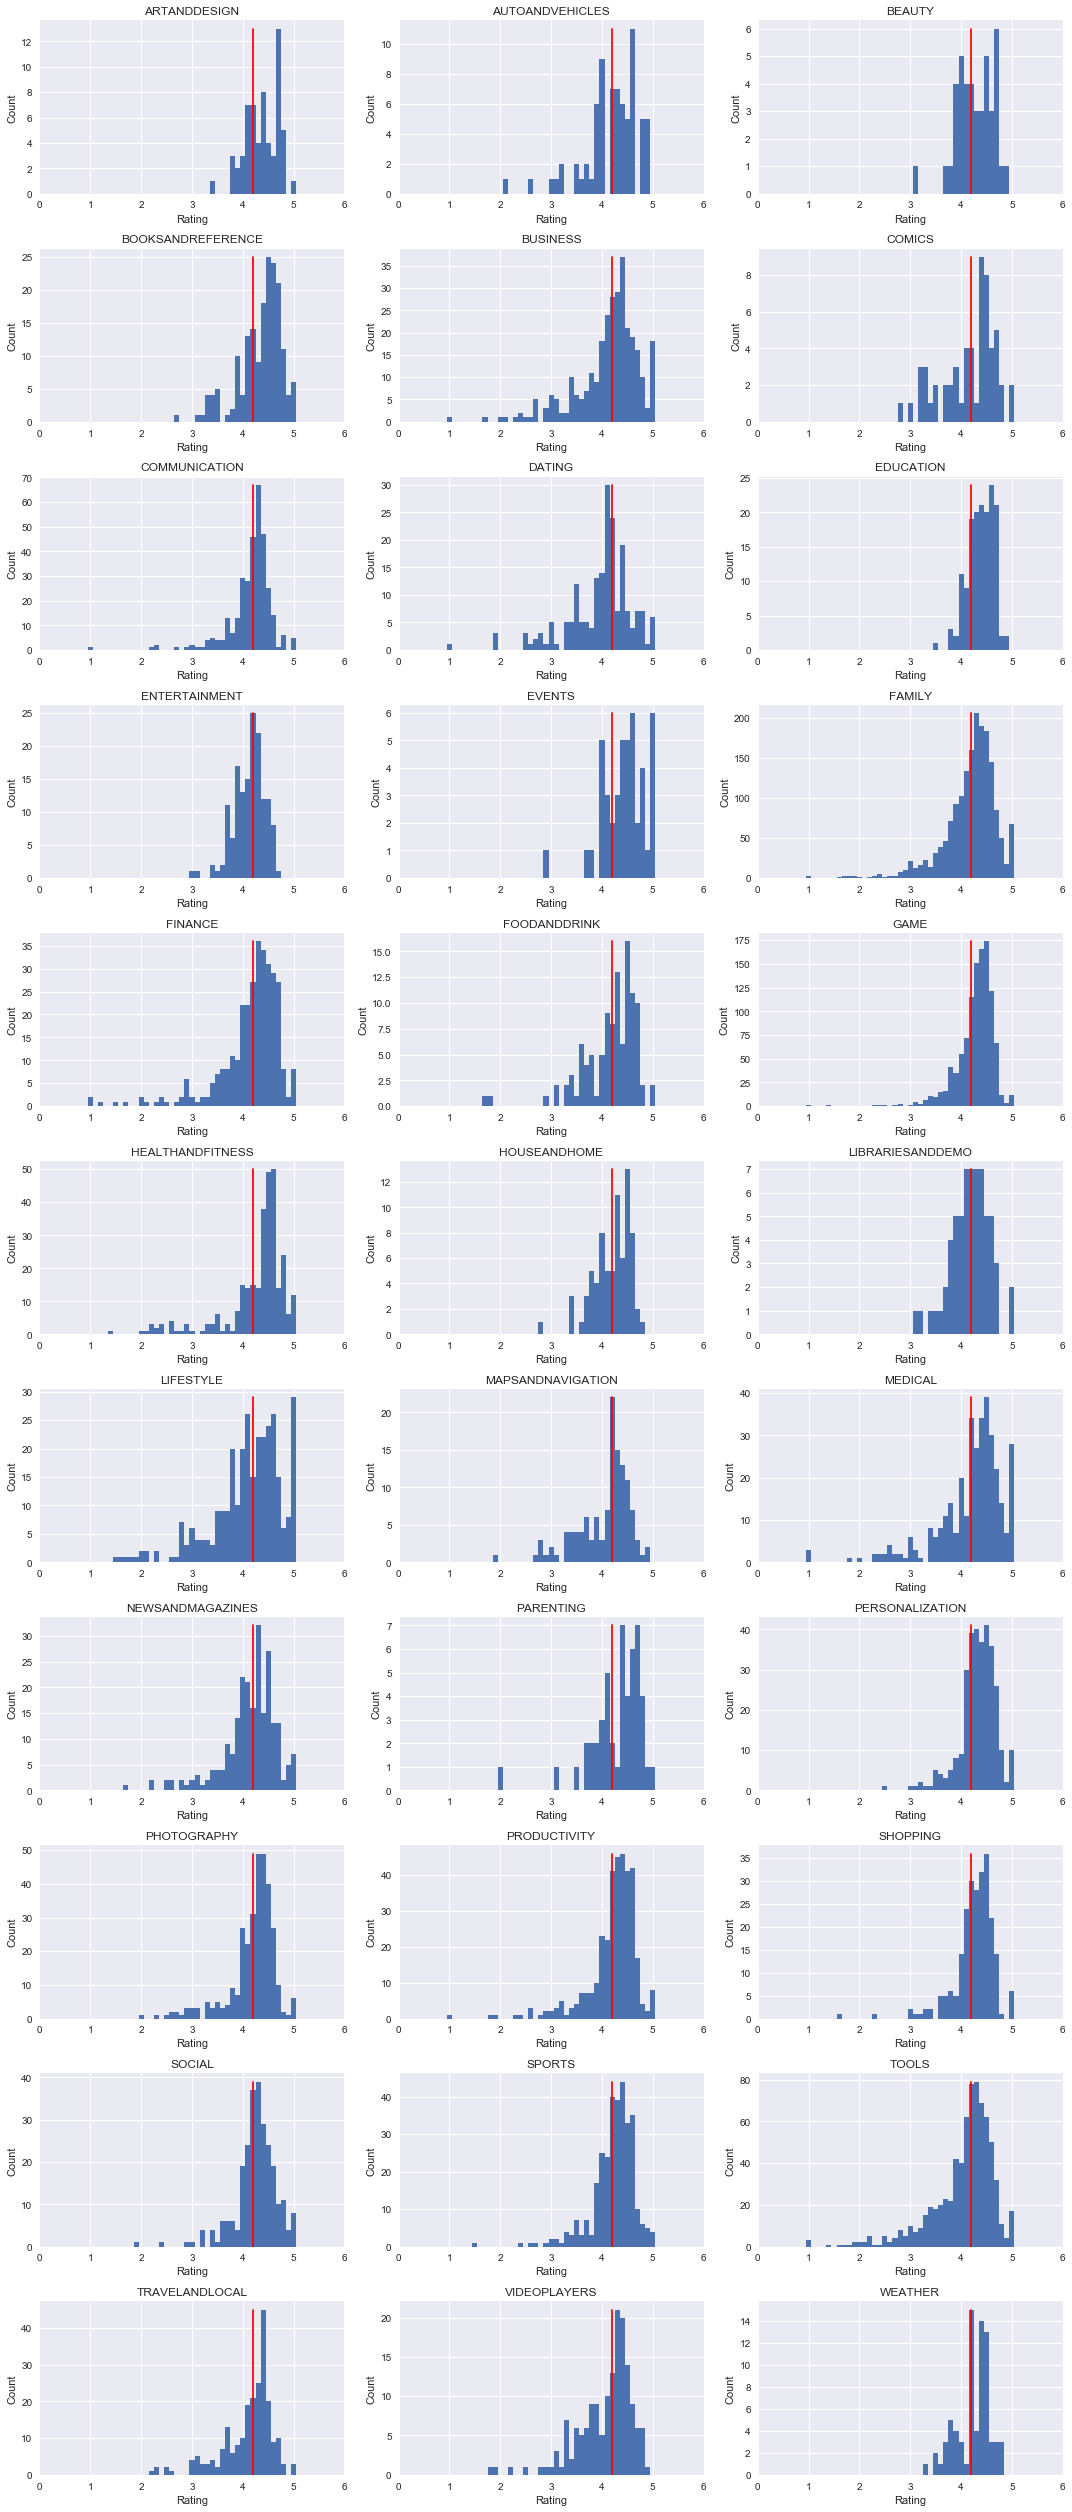

In [28]:
mean = df['Rating'].mean()
plt.figure(figsize=(15,35))
for i in range(len(cattypes)):
    plt.tight_layout()
    types = df[df['Category'] == cattypes[i]].groupby('Rating').count().index.tolist()
    count = df[df['Category'] == cattypes[i]].groupby('Rating').count()['App'].tolist()
    plt.subplot(11,3, i+1)
    plt.plot([mean, mean], [0, max(count)], 'r-')
    plt.bar(types, count, width=0.1)
    plt.xlim(0, 6)
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title(cattypes[i])
plt.show()

In [29]:
types

[3.3, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8]

In [30]:
count

[1, 2, 1, 3, 5, 4, 3, 1, 15, 4, 14, 13, 3, 3, 3]

In [31]:
cattypes

['ARTANDDESIGN',
 'AUTOANDVEHICLES',
 'BEAUTY',
 'BOOKSANDREFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FAMILY',
 'FINANCE',
 'FOODANDDRINK',
 'GAME',
 'HEALTHANDFITNESS',
 'HOUSEANDHOME',
 'LIBRARIESANDDEMO',
 'LIFESTYLE',
 'MAPSANDNAVIGATION',
 'MEDICAL',
 'NEWSANDMAGAZINES',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'SOCIAL',
 'SPORTS',
 'TOOLS',
 'TRAVELANDLOCAL',
 'VIDEOPLAYERS',
 'WEATHER']

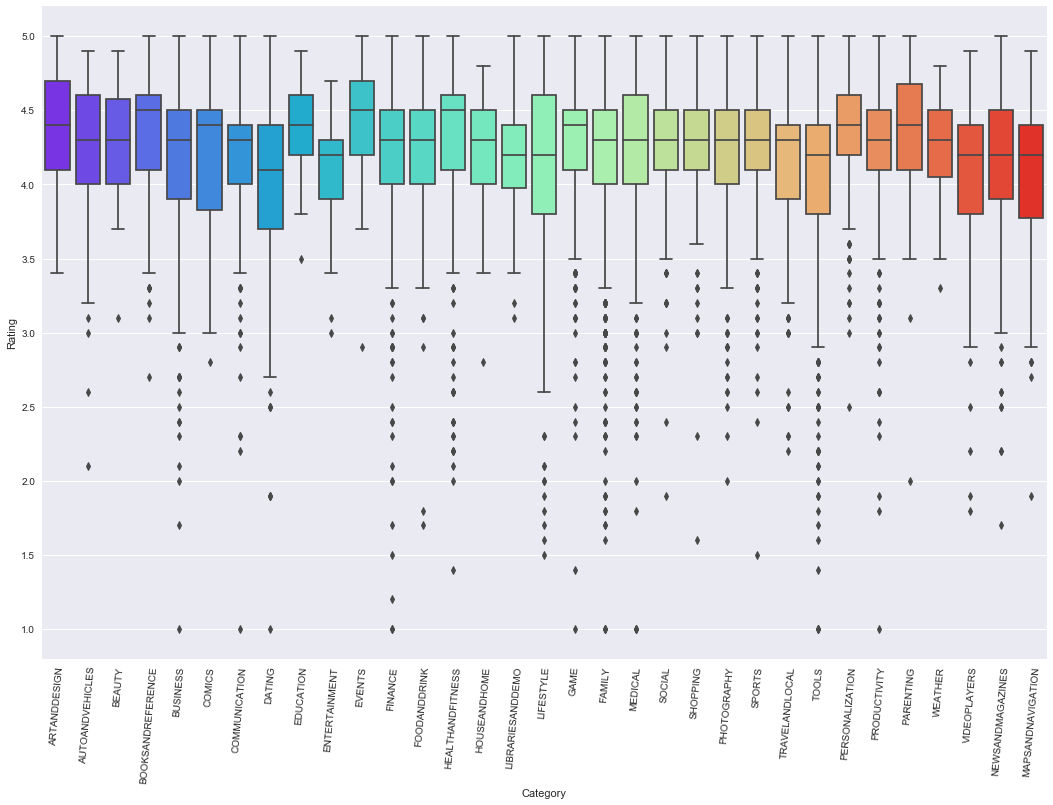

In [32]:
# Category vs Rating Box-and-Whisker
plt.figure(figsize=(18,12))
plt.xticks(rotation=85)
sns.boxplot(x='Category', y='Rating', data=df, palette='rainbow')

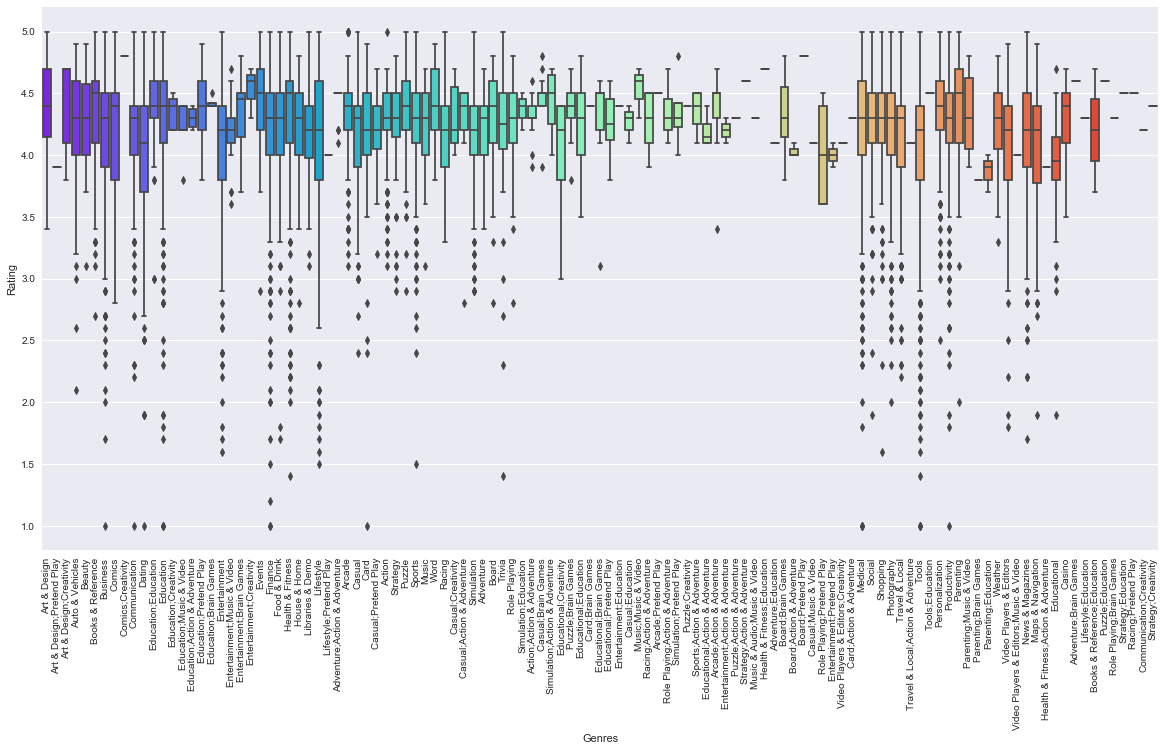

In [33]:
# Genre vs Rating Box-and-Whisker
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.boxplot(x='Genres', y='Rating', data=df, palette='rainbow')

### ii.Suitable app size

Text(0.5, 0.98, 'How does an app\\s size affect its rating?')

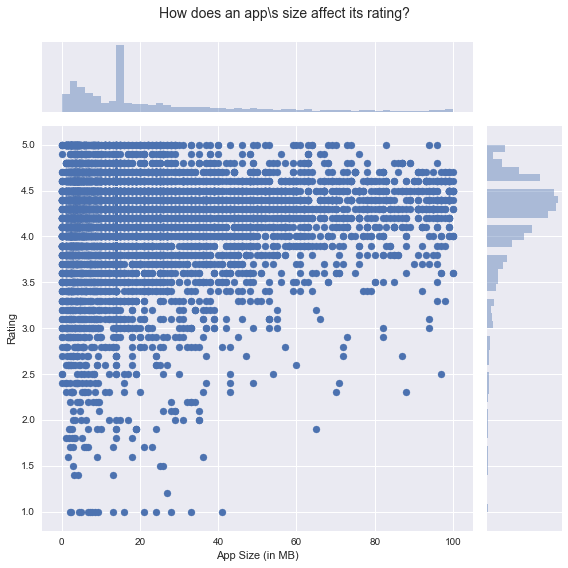

In [34]:
sns.jointplot(x='Size', y='Rating', data=df, height=8).set_axis_labels("App Size (in MB)","Rating")
plt.subplots_adjust(top=0.92)
plt.suptitle('How does an app\s size affect its rating?', fontsize = 14)

Text(0.5, 0.98, "How does an app's size affect its rating?(paid)")

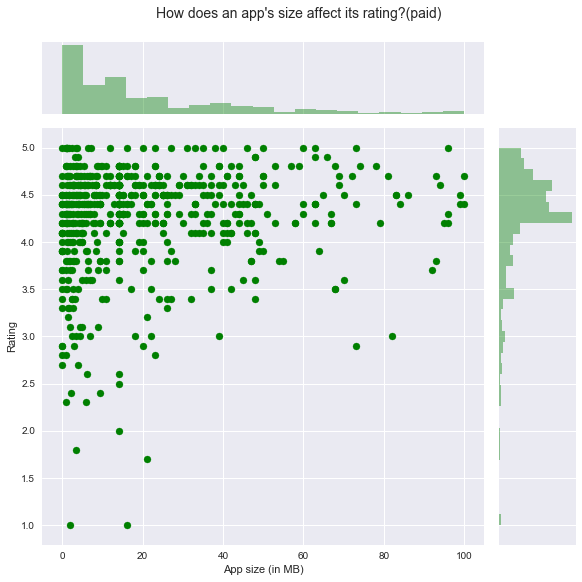

In [35]:
lst = df[df['Price'] != 0][['Size','Rating']].values.tolist()
sizes = []
ratings = []
for i in lst:
    sizes.append(float(i[0]))
    ratings.append(i[1])
sns.jointplot(x=sizes, y=ratings, height=8, color='green').set_axis_labels("App size (in MB)","Rating")
plt.subplots_adjust(top=0.92)
plt.suptitle('How does an app\'s size affect its rating?(paid)', fontsize = 14)
# Paid users prefer lightweight apps, most likely niche, and are designed to very specific roles only 
# Large sized, too vanilla paid app will not do well in the market

In [36]:
df[df['Price'] != 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,14.0,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,FO Bixby,PERSONALIZATION,5.0,5,1.0,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10697,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
10760,Fast Tract Diet,HEALTHANDFITNESS,4.4,35,2.4,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11.0,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


Text(0.5, 0.98, "How does app's affect its rating?(Free)")

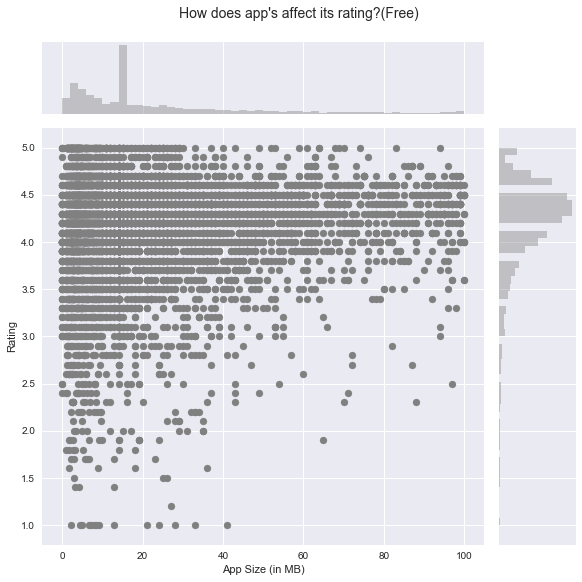

In [37]:
ist = df[df['Price'] == 0][['Size','Rating']].values.tolist()
sizes = []
ratings = []
for i in ist:
    sizes.append(float(i[0]))
    ratings.append(i[1])
sns.jointplot(x=sizes,y=ratings, height=8, color='grey').set_axis_labels("App Size (in MB)","Rating")
plt.subplots_adjust(top=0.92)
plt.suptitle('How does app\'s affect its rating?(Free)', fontsize =14)
# Very Weak Correlation here on the other hand

In [38]:
df[df['Price'] != 0][['Size', 'Rating']]

,Size,Rating
234,6.8,4.7
235,39.0,4.8
290,6.8,4.7
291,39.0,4.8
427,14.0,4.0
...,...,...
10690,1.0,5.0
10697,16.0,5.0
10760,2.4,4.4
10782,11.0,3.8


### iii. Suitable App Price

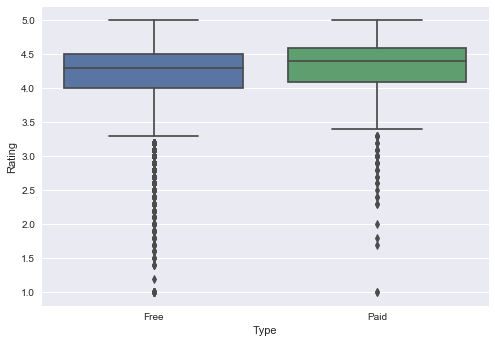

In [39]:
sns.boxplot(x='Type', y='Rating', data = df)

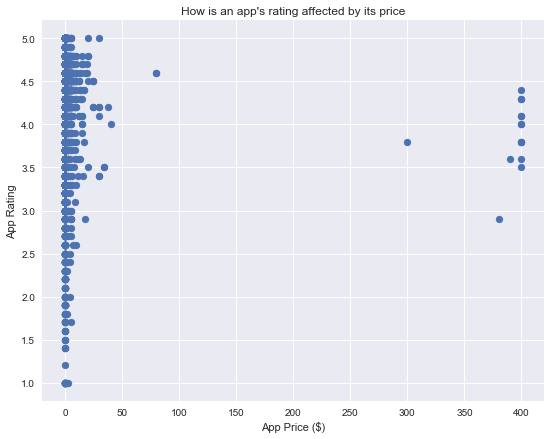

In [40]:
lst2 = df[['Price','Rating']].values.tolist()
prices = []
ratings = []
for i in lst2:
    prices.append(float(i[0]))
    ratings.append(i[1])
plt.figure(figsize=(9,7))
plt.scatter(prices, ratings)
plt.xlabel('App Price ($)')
plt.ylabel('App Rating')
plt.title('How is an app\'s rating affected by its price')
plt.show()
# Most apps are optimally priced around $0 to $30

In [41]:
df[['Price', 'Rating']]

,Price,Rating
0,0.0,4.1
1,0.0,3.9
2,0.0,4.7
3,0.0,4.5
4,0.0,4.3
...,...,...
10834,0.0,4.0
10836,0.0,4.5
10837,0.0,5.0
10839,0.0,4.5


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null object
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1.3+ MB


Text(0.5, 1.0, 'Average App Price based on Categories')

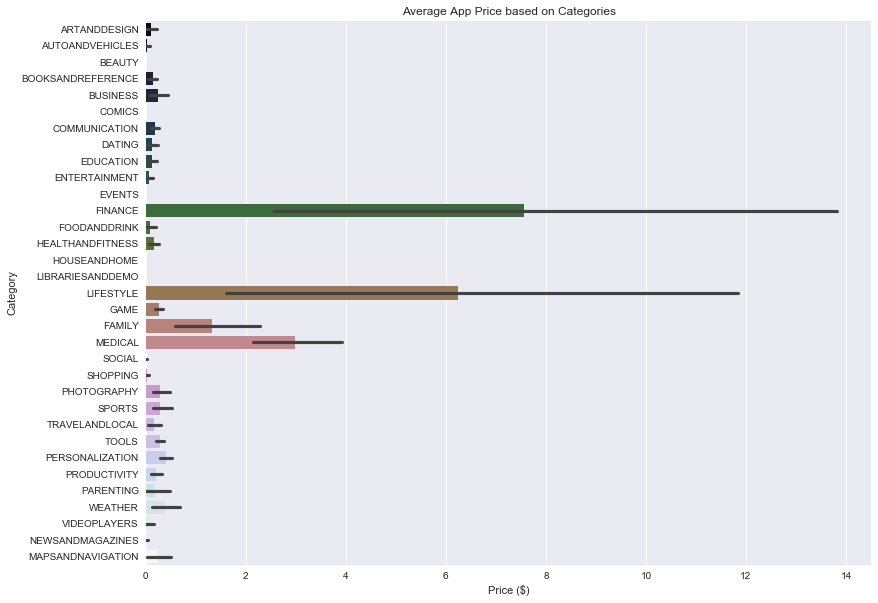

In [43]:
plt.figure(figsize=(13,10))
sns.barplot(x='Price', y='Category', data=df, palette='cubehelix',orient='h')
plt.xlabel('Price ($)')
plt.title('Average App Price based on Categories')
# Finance, Lifestyle, and Medical apps are most expensive


### iv Effect of reviews

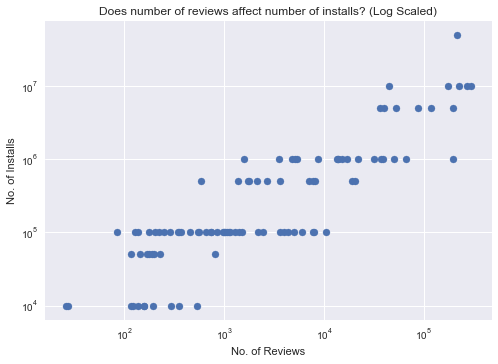

In [44]:
import collections
in_lst = df['Installs'].tolist()[:100]
in_lst = np.array(in_lst)
in_lst = in_lst.astype(int)

re_lst = df['Reviews'].tolist()[:100]
re_lst = np.array(re_lst)
re_lst = re_lst.astype(int)

dct = {}
for i,r in zip(in_lst, re_lst):
    dct[r] = i
    
dct1 = dict(collections.OrderedDict(sorted(dct.items())))

plt.xlabel('No. of Reviews')
plt.ylabel('No. of Installs')
plt.yscale('symlog')
plt.xscale('symlog')
plt.scatter(dct1.keys(), dct1.values())
plt.title('Does number of reviews affect number of installs? (Log Scaled)')
plt.show()

# So, users are more likely to install an app if it has been reviewed by a large amount of people
# On the other hand, this would mean active users which download an app are likely to leave a review/feedback

In [45]:
dct1

{26: 10000,
 27: 10000,
 85: 100000,
 117: 10000,
 118: 50000,
 121: 10000,
 129: 100000,
 136: 10000,
 138: 100000,
 142: 50000,
 158: 10000,
 159: 10000,
 167: 50000,
 176: 100000,
 178: 50000,
 190: 50000,
 192: 10000,
 197: 50000,
 203: 100000,
 223: 100000,
 227: 50000,
 250: 100000,
 284: 100000,
 295: 10000,
 348: 100000,
 353: 10000,
 356: 100000,
 367: 100000,
 450: 100000,
 534: 10000,
 542: 100000,
 564: 100000,
 591: 500000,
 654: 100000,
 736: 100000,
 737: 100000,
 805: 50000,
 845: 100000,
 967: 100000,
 994: 100000,
 1015: 100000,
 1070: 100000,
 1120: 100000,
 1150: 100000,
 1288: 100000,
 1379: 500000,
 1403: 100000,
 1518: 100000,
 1598: 1000000,
 1739: 500000,
 1754: 500000,
 2155: 500000,
 2206: 100000,
 2431: 100000,
 2680: 500000,
 3574: 1000000,
 3617: 100000,
 3632: 500000,
 3971: 100000,
 4326: 100000,
 4806: 1000000,
 5035: 100000,
 5097: 1000000,
 5414: 1000000,
 6090: 100000,
 7021: 500000,
 7699: 500000,
 7774: 100000,
 7880: 100000,
 8145: 500000,
 8788: 

Text(0.5, 1.0, 'Average App Rating referring to No. of Reviews')

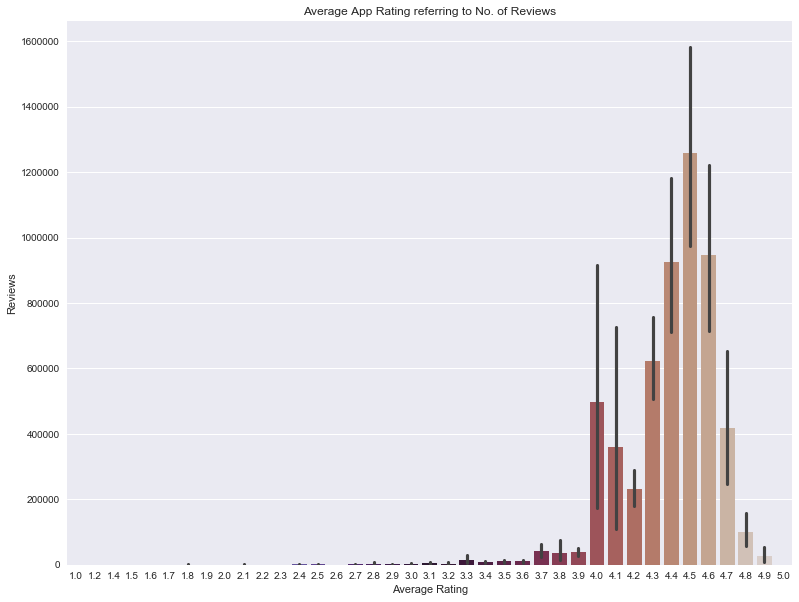

In [46]:
plt.figure(figsize=(13,10))
sns.barplot(x='Rating', y='Reviews', data=df, palette='twilight')
plt.xlabel('Average Rating')
plt.title('Average App Rating referring to No. of Reviews')

### v. Best Supportive Months for Developer Support

In [47]:
df['Last Updated'] = df['Last Updated'].apply(lambda x: (''.join([i for i in x if not i.isdigit()])))
df['Last Updated'] = df['Last Updated'].apply(lambda x: x.replace(' ,', ''))

In [48]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ARTANDDESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,January,1.0.0,4.0.3 and up
1,Coloring book moana,ARTANDDESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,January,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ARTANDDESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,August,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ARTANDDESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,June,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ARTANDDESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,June,1.1,4.4 and up


In [49]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
installdf = df[['Last Updated', 'Installs']]
installdf['Installs'] = label.fit_transform(installdf['Installs'])

installdf['Last Updated'] = installdf['Last Updated'].apply(lambda x: x[:3])
installdf['Last Updated'] = pd.to_datetime(installdf['Last Updated'], format='%b', errors='coerce').dt.month
installdf = installdf.sort_values(by='Last Updated')
installdf.head()

dummyinstall = df[['Last Updated','Installs']]
dummyinstall['Last Updated'] = dummyinstall['Last Updated'].apply(lambda x: x[:3])
dummyinstall['Last Updated'] = pd.to_datetime(dummyinstall['Last Updated'], format='%b', errors='coerce').dt.month
dummyinstall = dummyinstall.sort_values(by='Last Updated')
dummyinstall.head()

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Last Updated,Installs
0,1,10000
5230,1,100
7823,1,5000
7820,1,10000
5133,1,1000


In [50]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

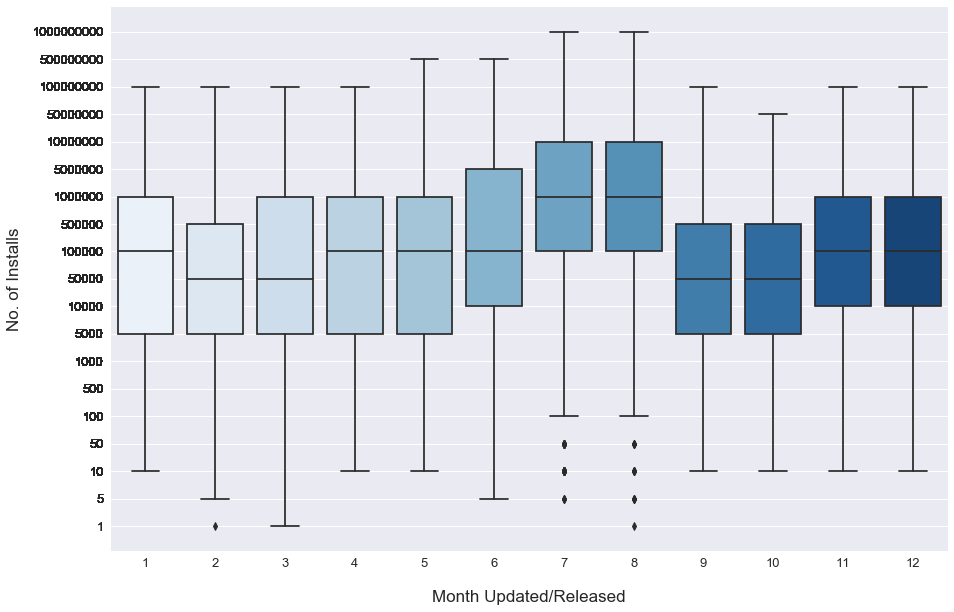

In [52]:
# Based on Last Updated/Released
months = ('January','February','March','April','May','June','July','August','September','October','November','December')
installs = df['Installs'].unique().tolist()
installs.sort()

plt.figure(figsize=(15,10))

plt.yticks(installdf['Installs'], dummyinstall['Installs'])
plt.ylabel('', labelpad=10, fontsize=17)
plt.xlabel('', labelpad=20, fontsize=17)

ax = sns.boxplot(x='Last Updated', y='Installs', data=installdf, palette='Blues', orient='v')
ax.tick_params(labelsize=13)
# ax.set_xticklabels(labels=months)
ax.set(xlabel='Month Updated/Released', ylabel='No. of Installs')
plt.show()


In [53]:
reviewdf = df[['Last Updated', 'Reviews']]
reviewdf['Reviews'] = label.fit_transform(reviewdf['Reviews'])

reviewdf['Last Updated'] = reviewdf['Last Updated'].apply(lambda x:x[:3])
reviewdf['Last Updated'] = pd.to_datetime(reviewdf['Last Updated'], format='%b', errors='coerce').dt.month
reviewdf = reviewdf.sort_values(by="Last Updated")
reviewdf.head()


# dummyReview = appdf[['Last Updated', 'Reviews']]
# dummyInstall['Last Updated'] = dummyInstall['Last Updated'].apply(lambda x: x[:3])
# dummyInstall['Last Updated'] = pd.to_datetime(dummyInstall['Last Updated'], format='%b', errors='coerce').dt.month
# dummyInstall = dummyInstall.sort_values(by="Last Updated")
# dummyInstall.head()

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Last Updated,Reviews
0,1,158
5230,1,43
7823,1,32
7820,1,124
5133,1,4


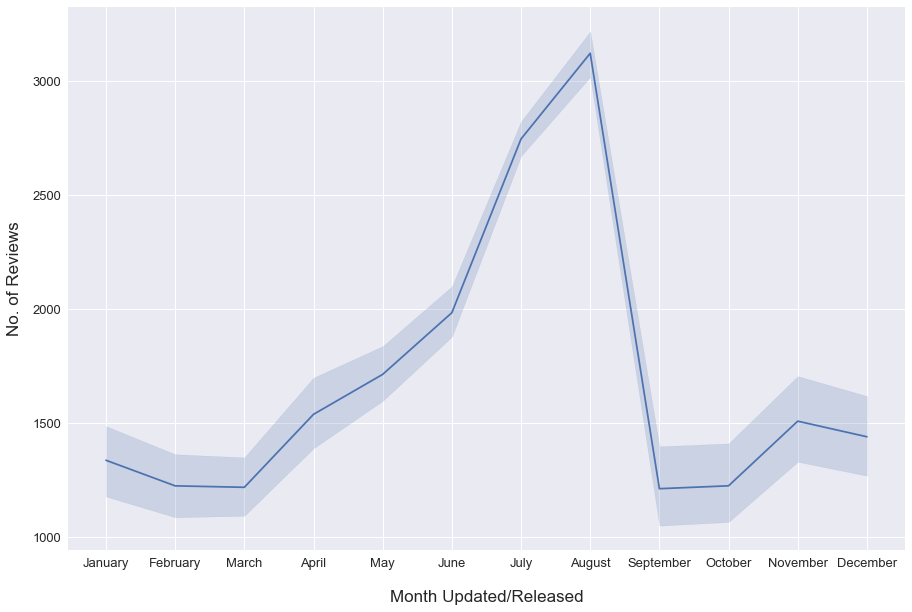

In [57]:
# Based on Last Updated/Released
months = ('January','February','March','April','May','June','July','August','September','October','November','December')

plt.figure(figsize=(15,10))
plt.ylabel('', labelpad=10, fontsize=17)
plt.xlabel('', labelpad=20, fontsize=17)

ax = sns.lineplot(x='Last Updated', y='Reviews', data=reviewdf)
ax.tick_params(labelsize=13)
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(labels=months)
ax.set(xlabel='Month Updated/Released', ylabel='No. of Reviews')
plt.show()

### vi. Android Version Support

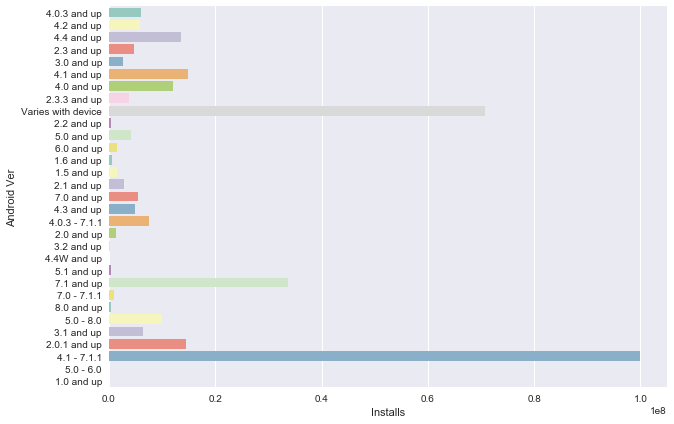

In [59]:
plt.figure(figsize=(10,7))
sns.barplot(x='Installs', y='Android Ver', data=df, palette='Set3',ci=None, orient='h')

### vii. Effect of Content Rating

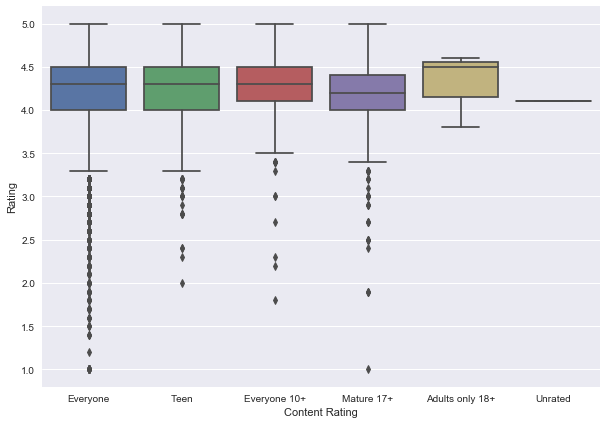

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Content Rating', y='Rating', data=df)

In [63]:
df[df['Content Rating'] == 'Adults only 18+'].groupby('Category')['App']

In [64]:
df[df['Content Rating'] == 'Adults only 18+'].groupby('Category')['App'].count().tolist()

[2, 1]

In [65]:
df[df['Content Rating'] == 'Adults only 18+'].groupby('Category')['App'].value_counts().unstack(fill_value=0).stack()
print(len(df[df['Content Rating'] == 'Everyone'].groupby('Category')['App'].count().tolist()))
print(len(df[df['Content Rating'] == 'Everyone 10+'].groupby('Category')['App'].count().tolist()))
print(len(df[df['Content Rating'] == 'Mature 17+'].groupby('Category')['App'].count().tolist()))
print(len(df[df['Content Rating'] == 'Teen'].groupby('Category')['App'].count().tolist()))

33
20
0
32


In [72]:
pivotdf = df.pivot_table(index='Category',
                        columns='Content Rating',
                        values = 'App',
                        fill_value=0,
                        aggfunc='count').unstack()

In [73]:
pivotdf

Content Rating   Category         
Adults only 18+  ARTANDDESIGN         0
                 AUTOANDVEHICLES      0
                 BEAUTY               0
                 BOOKSANDREFERENCE    0
                 BUSINESS             0
                                     ..
Unrated          SPORTS               0
                 TOOLS                1
                 TRAVELANDLOCAL       0
                 VIDEOPLAYERS         0
                 WEATHER              0
Length: 198, dtype: int64

In [74]:
df[df['Content Rating'] == 'Adults only 18+'].groupby('Category')['App'].count()

Category
COMICS    2
SPORTS    1
Name: App, dtype: int64

In [75]:
# pivotdf.loc['Adults only 18+']
pivotdf.loc['Adults only 18+']

Category
ARTANDDESIGN         0
AUTOANDVEHICLES      0
BEAUTY               0
BOOKSANDREFERENCE    0
BUSINESS             0
COMICS               2
COMMUNICATION        0
DATING               0
EDUCATION            0
ENTERTAINMENT        0
EVENTS               0
FAMILY               0
FINANCE              0
FOODANDDRINK         0
GAME                 0
HEALTHANDFITNESS     0
HOUSEANDHOME         0
LIBRARIESANDDEMO     0
LIFESTYLE            0
MAPSANDNAVIGATION    0
MEDICAL              0
NEWSANDMAGAZINES     0
PARENTING            0
PERSONALIZATION      0
PHOTOGRAPHY          0
PRODUCTIVITY         0
SHOPPING             0
SOCIAL               0
SPORTS               1
TOOLS                0
TRAVELANDLOCAL       0
VIDEOPLAYERS         0
WEATHER              0
dtype: int64

In [76]:
adultsOnly = pivotdf.loc['Adults only 18+']
everyOne = pivotdf.loc['Everyone']
tenPlus = pivotdf.loc['Everyone 10+']
mature = pivotdf.loc['Mature 17+']
teen = pivotdf.loc['Teen']
scaleAdults = []
scaleEvery = []
scaleTen = []
scaleMature = []
scaleTeen = []

scaleAdults = np.array(adultsOnly)
scaleEvery = np.array(everyOne)
scaleTen = np.array(tenPlus)
scaleMature = np.array(mature)
scaleTeen = np.array(teen)

In [85]:
# adultsOnly
# everyOne 
# tenPlus 
# mature 
# teen 
# scaleAdults 
# scaleEvery
# scaleTen 
scaleMature 
# scaleTeen 

array([  0,   0,   1,   3,   0,   7,   9, 179,   3,   9,   0,  44,   0,
         0,  74,   7,   0,   0,   9,   1,   6,  13,   1,   8,   5,   1,
         3,  66,   7,   1,   1,   2,   1], dtype=int64)

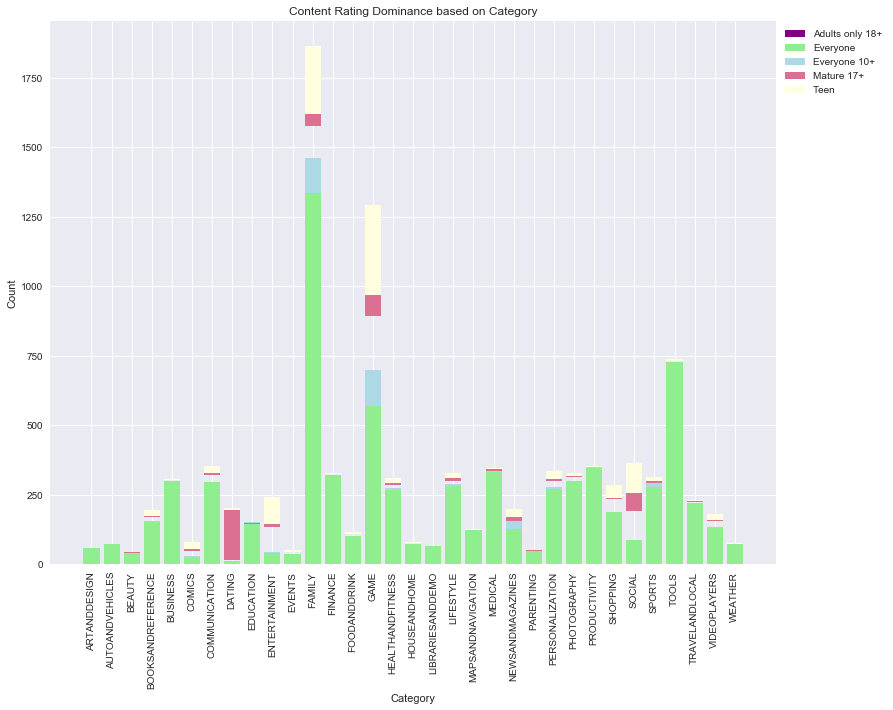

In [88]:
catTypes = df.groupby('Category').count().index.tolist()
plt.figure(figsize=(13,10))

p1 = plt.bar(catTypes, adultsOnly, color='purple')
p2 = plt.bar(catTypes, everyOne, bottom=scaleAdults, color='lightgreen')
p3 = plt.bar(catTypes, tenPlus, bottom=[i+j for i,j in zip(scaleAdults, scaleEvery)], color='lightblue')
p4 = plt.bar(catTypes, mature, bottom=[i+j+k for i,j,k in zip(scaleAdults, scaleEvery, scaleTeen)], color='#DB7093')
p5 = plt.bar(catTypes, teen, bottom=[i+j+k+l for i,j,k,l in zip(scaleAdults, scaleEvery, scaleTeen, scaleMature)],color='lightyellow')

plt.legend(['Adults only 18+','Everyone','Everyone 10+','Mature 17+','Teen'], loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.title('Content Rating Dominance based on Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [89]:
catTypes

['ARTANDDESIGN',
 'AUTOANDVEHICLES',
 'BEAUTY',
 'BOOKSANDREFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FAMILY',
 'FINANCE',
 'FOODANDDRINK',
 'GAME',
 'HEALTHANDFITNESS',
 'HOUSEANDHOME',
 'LIBRARIESANDDEMO',
 'LIFESTYLE',
 'MAPSANDNAVIGATION',
 'MEDICAL',
 'NEWSANDMAGAZINES',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'SOCIAL',
 'SPORTS',
 'TOOLS',
 'TRAVELANDLOCAL',
 'VIDEOPLAYERS',
 'WEATHER']